### 시계열 데이터 분석

In [2]:
# 필요 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# parse_dates=['date'] 를 통해 스트링 형태의 Date를 인덱스로 보냄과 동시에 Date형태로 만듬
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


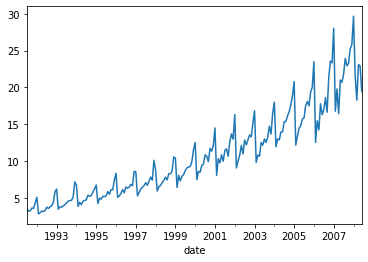

In [3]:
df.value.plot();

In [6]:
# 최근 데이터 묶기
df = df[df.index > '1999-12-31']
df

,value
date,
2000-01-01,12.511462
2000-02-01,7.457199
2000-03-01,8.591191
2000-04-01,8.474000
2000-05-01,9.386803
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [9]:
# 시즌별 분류 'seasonal_decopose()' 가 시즌별로 알아서 분류 해줌
# 시계열 분해는 'additive' = 덧셈 분해, 'multiplicative' = 곱셈 분해로 나뉨
# two_sided=False 시에는 이동평균계산이 과거값에만 적용
result = seasonal_decompose(df, model='additive', two_sided=False)

<Figure size 2880x2880 with 0 Axes>

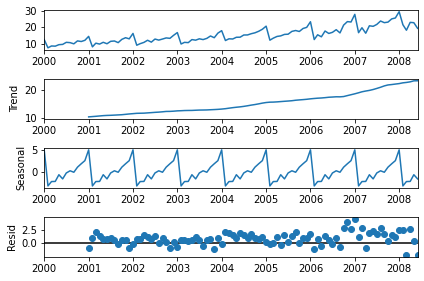

In [23]:
plt.figure(figsize=(40,40))
result.plot();

In [32]:
result.observed

date
2000-01-01    12.511462
2000-02-01     7.457199
2000-03-01     8.591191
2000-04-01     8.474000
2000-05-01     9.386803
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Length: 102, dtype: float64

In [33]:
result.trend

date
2000-01-01          NaN
2000-02-01          NaN
2000-03-01          NaN
2000-04-01          NaN
2000-05-01          NaN
                ...    
2008-02-01    22.482596
2008-03-01    22.622704
2008-04-01    22.837394
2008-05-01    23.195400
2008-06-01    23.223005
Name: trend, Length: 102, dtype: float64

In [30]:
# 하나로 묶어서 분석에 용이하도록 만들기
# axis=1 -> 열 기준으로 합침
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)
df_re

,0,trend,seasonal,resid
date,,,,
2000-01-01,12.511462,NaN,5.061367,NaN
2000-02-01,7.457199,NaN,-3.307973,NaN
2000-03-01,8.591191,NaN,-2.293969,NaN
2000-04-01,8.474000,NaN,-2.264396,NaN
2000-05-01,9.386803,NaN,-0.711368,NaN
...,...,...,...,...
2008-02-01,21.654285,22.482596,-3.307973,2.479662
2008-03-01,18.264945,22.622704,-2.293969,-2.063790
2008-04-01,23.107677,22.837394,-2.264396,2.534679


In [31]:
df_re.columns=['obs','trend','seasonal','resid']
df_re.dropna(inplace=True)
df_re

,obs,trend,seasonal,resid
date,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590
2001-02-01,8.049275,10.398229,-3.307973,0.959019
2001-03-01,10.312891,10.494636,-2.293969,2.112225
2001-04-01,9.753358,10.619680,-2.264396,1.398075
2001-05-01,10.850382,10.733969,-0.711368,0.827781
...,...,...,...,...
2008-02-01,21.654285,22.482596,-3.307973,2.479662
2008-03-01,18.264945,22.622704,-2.293969,-2.063790
2008-04-01,23.107677,22.837394,-2.264396,2.534679


In [34]:
df_re['year']=df_re.index.year
df_re

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001
...,...,...,...,...,...
2008-02-01,21.654285,22.482596,-3.307973,2.479662,2008
2008-03-01,18.264945,22.622704,-2.293969,-2.063790,2008
2008-04-01,23.107677,22.837394,-2.264396,2.534679,2008


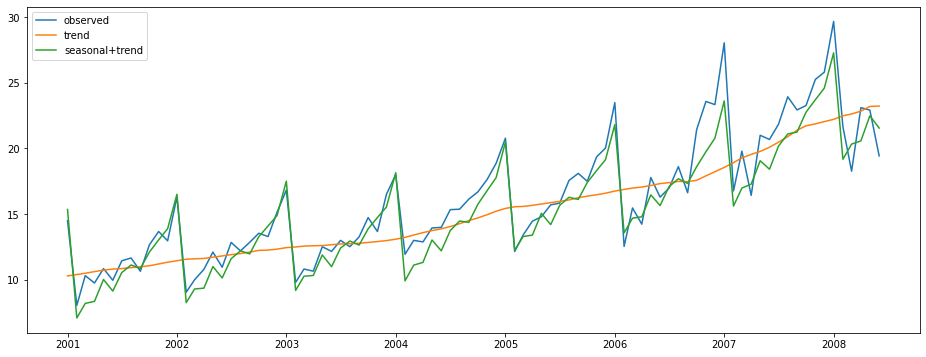

In [43]:
# 시각화
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend']);
# plt.plot(df_re.resid);

In [52]:
df_re.index[1]

Timestamp('2001-02-01 00:00:00')

In [53]:
def get_date(date):
    return (str(date.year)+'-'+str(date.month))

In [60]:
get_date(df_re.index[89])

'2008-6'

ValueError: The number of FixedLocator locations (89), usually from a call to set_ticks, does not match the number of ticklabels (90).

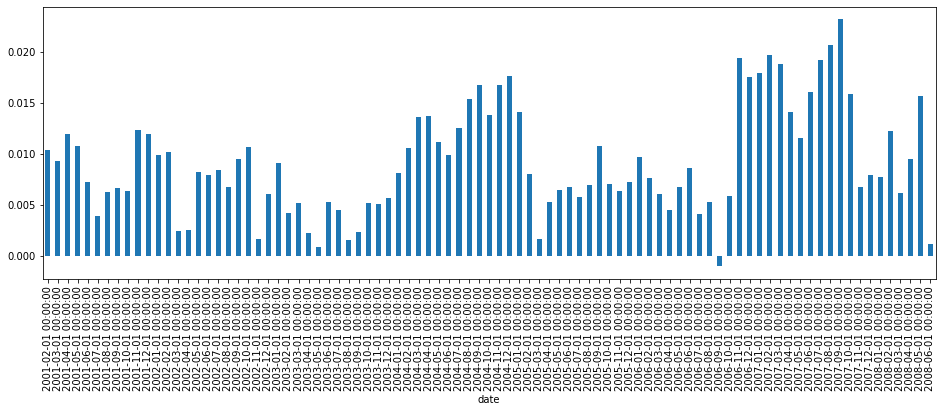

In [65]:
# trend
ax=df_re.trend.pct_change().dropna().plot(kind='bar', figsize=(16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index )))

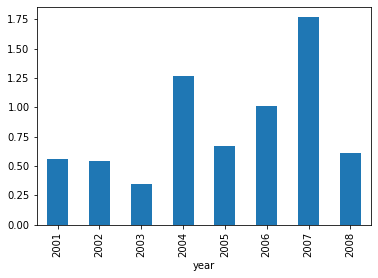

In [63]:
# Residual 들여다 보기
df_re.groupby('year')['resid'].mean().plot(kind='bar');

### 주기에 따른 특성

In [72]:
# 필수 라이브러리 및 데이터 다운

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

# 필수 라이브러리
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')
df.head()

,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [73]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DEXKOUS  1306 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


In [77]:
# 컬럼 이름 짧게 변경
df.columns = ['KOUS']

In [78]:
df['KOUS'].replace('.','',inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KOUS    1306 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


In [82]:
df['KOUS'] = pd.to_numeric(df['KOUS'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1251 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [84]:
# 결측치 확인
df.isnull().sum()

KOUS    55
dtype: int64

In [85]:
# 결측치 처리
df['KOUS'].fillna(method='ffill', inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


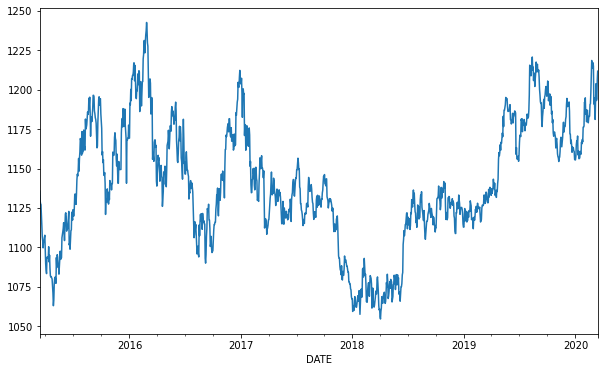

In [89]:
df['KOUS'].plot(figsize=(10,6));

<AxesSubplot:xlabel='DATE'>

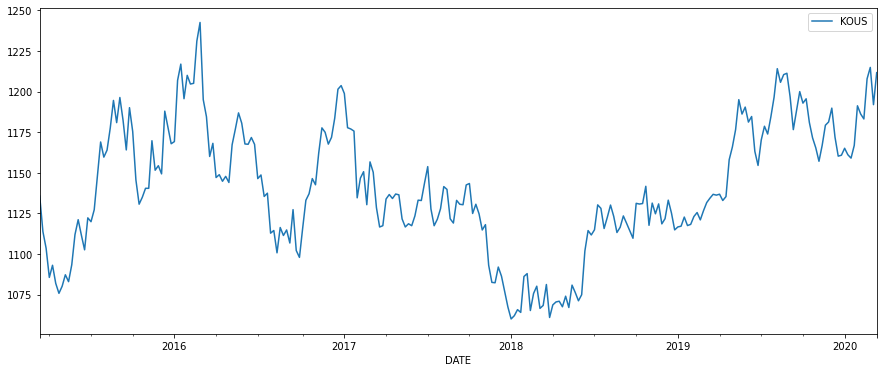

In [93]:
# .resample() -> 일별 데이터를 주,월 단위로 변환 가능
# df.resample('W-Fri').last() -> 구체적으로 주 단위로 들고 와짐
# df.resample('M').last()
df.resample('W-Fri').last().plot(figsize=(15,6))

In [96]:
# .rolling() -> 이전 xx일에 대한 이동 평균, 이동 sum을 산출 할 수 있음
df.rolling(10).mean().head(20) # 이전 30일에 대한 값

,KOUS
DATE,
2015-03-13,NaN
2015-03-16,NaN
2015-03-17,NaN
2015-03-18,NaN
2015-03-19,NaN
2015-03-20,NaN
2015-03-23,NaN
2015-03-24,NaN
2015-03-25,NaN


<AxesSubplot:xlabel='DATE'>

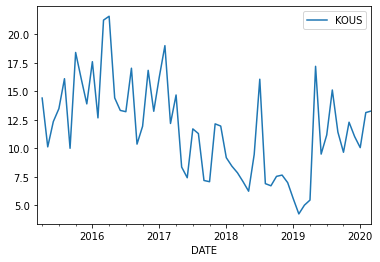

In [100]:
# 매 월의 표준 편차
df.rolling(30).std().resample('M').mean().plot()

### 안정성 테스트

In [101]:
adfuller(df['KOUS'])

(-2.6235188039221238,
 0.08823317575724848,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '5%': -2.8637572934525286,
  '10%': -2.56795049999266},
 8358.34690710183)

In [102]:
# 안정성 있게 변하는 공식은 아래와 같다
# y(t+1)/y(t) - 1 -> 증가율
# log(y(t+1))-log(y(t)) -> 로그 차분

adfuller(df.KOUS.pct_change().dropna())

(-26.943541201332884,
 0.0,
 1,
 1303,
 {'1%': -3.435378572037035,
  '5%': -2.863760700696655,
  '10%': -2.56795231450063},
 -9698.633396210715)

In [105]:
(df.KOUS/df.KOUS.shift(1)-1).dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [106]:
(np.log(df.KOUS)-np.log(df.KOUS.shift(1))).dropna()

DATE
2015-03-16   -0.005368
2015-03-17   -0.001710
2015-03-18   -0.000532
2015-03-19   -0.005231
2015-03-20   -0.006568
                ...   
2020-03-09    0.009809
2020-03-10   -0.008887
2020-03-11    0.000888
2020-03-12    0.010024
2020-03-13    0.004558
Name: KOUS, Length: 1305, dtype: float64